In [1]:
import numpy as np
import pandas as pd
import os 
import glob 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import scipy
import csv

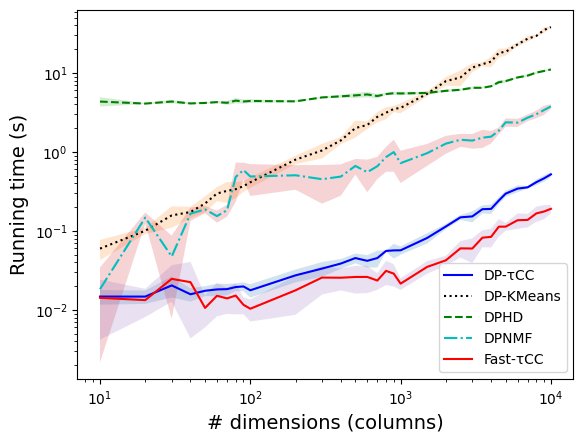

In [2]:
dimensions = [(1000,10),(1000,20),(1000,30),(1000,40),(1000,50),(1000,60),(1000,70),(1000,80),(1000,90),(1000,100),(1000,200),(1000,300),(1000,400),(1000,500),(1000,600),(1000,700),(1000,800),(1000,900),(1000,1000),(1000,1500),(1000,2000),(1000,2500),(1000,3000),(1000,3500),(1000,4000),(1000,4500),(1000,5000),(1000,6000),(1000,7000),(1000,8000),(1000,9000),(1000,10000)]

nclus = [(3,3)]
noise_list = [3]
eps_list = [0.99999]

n_iterations=4

for selected_model in eps_list:
    dimy = []
    dptaucc_ex_time = []
    dpkm_ex_time = []
    dpnmf_ex_time = []
    dphd_ex_time = []
    dptaucc_ex_time_std = []
    dpkm_ex_time_std = []
    dpnmf_ex_time_std = []
    dphd_ex_time_std = []
    taucc_ex_time = []
    taucc_ex_time_std = []
    for dim in dimensions:
        for nc in nclus:
            for noise in noise_list:
                path = os.getcwd()
                path=os.path.join(path,"output/dptaucc")
                f1=os.path.join(path,  f"mat_{dim[0]}_{dim[1]}_nc{nc[0]}_{nc[1]}_noise{noise}_time_{n_iterations}_results.csv")
                path = os.getcwd()
                path=os.path.join(path,"output/taucc")
                f2=os.path.join(path,f"mat_{dim[0]}_{dim[1]}_nc{nc[0]}_{nc[1]}_noise{noise}_time_results.csv")
                path = os.getcwd()
                path=os.path.join(path,"output/dpkm")
                f3=os.path.join(path,  f"mat_{dim[0]}_{dim[1]}_nc{nc[0]}_{nc[1]}_noise{noise}_time_results.csv")
                path = os.getcwd()
                path=os.path.join(path,"output/dphd")
                f4=os.path.join(path,  f"mat_{dim[0]}_{dim[1]}_nc{nc[0]}_{nc[1]}_noise{noise}_time_{n_iterations}_results.csv")
                path = os.getcwd()
                path=os.path.join(path,"output/dpnmf")
                f5=os.path.join(path,  f"mat_{dim[0]}_{dim[1]}_nc{nc[0]}_{nc[1]}_noise{noise}_time_{n_iterations}_results.csv")
                data_cc = pd.read_csv(f1)
                data_cc_means = data_cc.groupby(['model'], as_index=False).mean()
                data_cc_std = data_cc.groupby(['model'], as_index=False).std()
                data_cc3 = pd.read_csv(f3)
                data_cc3_means = data_cc3.groupby(['model'], as_index=False).mean()
                data_cc3_std = data_cc3.groupby(['model'], as_index=False).std()
                data_cc4 = pd.read_csv(f4).drop(columns=['sse'])
                data_cc4_means = data_cc4.groupby(['model'], as_index=False).mean()
                data_cc4_std = data_cc4.groupby(['model'], as_index=False).std()
                data_cc5 = pd.read_csv(f5)
                data_cc5_means = data_cc5.groupby(['model'], as_index=False).mean()
                data_cc5_std = data_cc5.groupby(['model'], as_index=False).std()
                data_cc1 = pd.read_csv(f2)
                ccex_time = data_cc1["execution_time"].mean()
                ccex_time_std = data_cc1["execution_time"].std()
                taucc_ex_time.append(ccex_time)
                taucc_ex_time_std.append(ccex_time_std)


                dimy.append(data_cc_means[data_cc_means['model']==selected_model]['dim_y'])
                dptaucc_ex_time.append(data_cc_means[data_cc_means['model']==selected_model]['execution_time'])
                dpkm_ex_time.append(data_cc3_means[data_cc3_means['model']==selected_model]['exec_time'])
                dphd_ex_time.append(data_cc4_means[data_cc4_means['model']==selected_model]['exec_time'])
                dpnmf_ex_time.append(data_cc5_means[data_cc5_means['model']==selected_model]['exec_time'])
                dptaucc_ex_time_std.append(data_cc_std[data_cc_std['model']==selected_model]['execution_time'])
                dpkm_ex_time_std.append(data_cc3_std[data_cc3_std['model']==selected_model]['exec_time'])
                dphd_ex_time_std.append(data_cc4_std[data_cc4_std['model']==selected_model]['exec_time'])
                dpnmf_ex_time_std.append(data_cc5_std[data_cc5_std['model']==selected_model]['exec_time'])

    plt.yscale('log')
    plt.xscale('log')
    plt.plot(dimy, dptaucc_ex_time, "-b", label="DP-\u03C4CC")
    plt.fill_between(np.array(dimy)[:,0], np.array(dptaucc_ex_time, dtype=float)[:,0]-np.array(dptaucc_ex_time_std, dtype=float)[:,0], np.array(dptaucc_ex_time, dtype=float)[:,0]+np.array(dptaucc_ex_time_std, dtype=float)[:,0], alpha=0.2)
    plt.plot(dimy, dpkm_ex_time, ":k", label="DP-KMeans")
    plt.fill_between(np.array(dimy)[:,0], np.array(dpkm_ex_time)[:,0]-np.array(dpkm_ex_time_std)[:,0], np.array(dpkm_ex_time)[:,0]+np.array(dpkm_ex_time_std)[:,0], alpha=0.2)
    plt.plot(dimy, dphd_ex_time, "--g", label="DPHD")
    plt.fill_between(np.array(dimy)[:,0], np.array(dphd_ex_time)[:,0]-np.array(dphd_ex_time_std)[:,0], np.array(dphd_ex_time)[:,0]+np.array(dphd_ex_time_std)[:,0], alpha=0.2)
    plt.plot(dimy, dpnmf_ex_time, "-.c", label="DPNMF")
    plt.fill_between(np.array(dimy)[:,0], np.array(dpnmf_ex_time)[:,0]-np.array(dpnmf_ex_time_std)[:,0], np.array(dpnmf_ex_time)[:,0]+np.array(dpnmf_ex_time_std)[:,0], alpha=0.2)
    plt.plot(dimy, taucc_ex_time, '-r', label='Fast-\u03C4CC')
    plt.fill_between(np.array(dimy)[:,0], np.array(taucc_ex_time)-np.array(taucc_ex_time_std), np.array(taucc_ex_time)+np.array(taucc_ex_time_std), alpha=0.2)
    plt.legend(loc="best")
    plt.xlabel('# dimensions (columns)', fontsize=14)
    plt.ylabel('Running time (s)', fontsize=14)
    plt.show()
